### Visualización de la precisión y el coste

Esta función recibe el nombre de un archivo de registro de entrenamiento y genera una visualización que contiene una gráfica superior y una inferior.  
En la gráfica superior se muestra la evolución de la precisión de entrenamiento y de test a lo largo de las épocas del entrenamiento.
En la gráfica inferior se muestra la evolución del coste medio de los  caminos generados a lo largo de las épocas del entrenamiento.

In [6]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV
def plot_csv(filename: str):
    epochs = []
    trains = []
    tests = []
    costs = []
    times = []

    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        first_row = True
        for row in reader:
            if first_row:
                first_row = False
                continue
            epoch, train, test, mean_path, time = row
            epochs.append(int(epoch))
            trains.append(float(train))
            tests.append(float(test))
            costs.append(float(mean_path))
            times.append(float(time))

    # Plot data
    plt.figure(figsize=(10, 5))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, trains, label='Training Accuracy')
    plt.plot(epochs, tests, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(epochs, costs, label='Mean Path Cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f'Maximum test accuracy achieved: {max(tests)} on Epoch: {tests.index(max(tests))}')

### Visualización de la precisión máxima según el estado interno

La función analyze_results recibe la ubicación de un archivo de registro de entrenamiento y el nombre de un hiperparámetro concreto.  
La función genera una visualización en la que se muestra un gráfico de barras con los valores posibles que cada hiperparámetro puede tomar a lo largo del eje X. 
En el eje Y se representa lamáxima precisión de test alcanzada por los modelos en los que el hiperparámetro indicado toma el valor mostrado en el eje X.

In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

import os
import pandas as pd
import matplotlib.pyplot as plt


def extract_hyperparam_value(filename, hyperparam):
    hyperparam_index = filename.find(hyperparam)
    if hyperparam_index == -1:
        return None

    value = filename[hyperparam_index + len(hyperparam) + 1:]
    if '_' in value:
        value = value.partition('_')[0]
    elif '.' in value:
        value = value.partition('.')[0]

    try:
        return float(value)
    except ValueError:
        return value


def analyze_results(directory: str, hyperparam: str):
    max_accuracies = {}
    best_hyperparams = {}

    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            hyperparam_value = extract_hyperparam_value(filename, hyperparam)

            if hyperparam_value is not None:
                file_path = os.path.join(directory, filename)
                # print(file_path)
                data = pd.read_csv(file_path)
                max_test_accuracy = data['Test_Accuracy'].max()

                if max_test_accuracy > max_accuracies.get(hyperparam_value, 0):
                    max_accuracies[hyperparam_value] = max_test_accuracy
                    best_hyperparams[hyperparam_value] = filename

    hyperparam_values = sorted(list(max_accuracies.keys()))
    accuracies = [max_accuracies[value] for value in hyperparam_values]
    batch_size = directory.split('/')[-1]
    
    plt.figure(figsize=(4, 3))
    plt.bar(range(len(hyperparam_values)), accuracies, tick_label=hyperparam_values)
    plt.xlabel(f'{hyperparam} for batch size of {batch_size}')
    plt.ylabel('Max Test Accuracy')
    plt.title(f'Max Test Accuracy for different values of {hyperparam}')
    plt.xticks(range(len(hyperparam_values)), hyperparam_values)
    plt.show()

    for value in hyperparam_values:
        print(f"For {hyperparam}={value}, max test accuracy {max_accuracies[value]} is achieved by the model with hyperparameters from file: {best_hyperparams[value]}")

### Plot factorial
Esta función recibe como entrada la ubicación de un directorio que contiene archivos de registro del entrenamiento de un modelo dado.  
La función muestra los resultados de la máxima precisión de test alcanzada por los modelos en forma de un heatmap en el que se muestran todas las combinaciones de valores posibles de hiperparámetros junto con la máxima precisión de test del modelo que los usa.

In [ ]:
def factorial_plot(directory: str):
    def extract_hyperparam_value(filename, hyperparam):
        hyperparam_index = filename.find(hyperparam)
        if hyperparam_index == -1:
            return None

        value = filename[hyperparam_index + len(hyperparam) + 1:]
        if '_' in value:
            value = value.partition('_')[0]
        elif '.' in value:
            value = value.partition('.')[0]

        try:
            return float(value)
        except ValueError:
            return value


    def analyze_res(directory, hyperparams):
        for hyperparam1, hyperparam2 in combinations(hyperparams, 2):
            data_dict = {}

            for filename in os.listdir(directory):
                if filename.endswith('.csv'):
                    param1_value = extract_hyperparam_value(filename, hyperparam1)
                    param2_value = extract_hyperparam_value(filename, hyperparam2)

                    if param1_value is not None and param2_value is not None:
                        file_path = os.path.join(directory, filename)
                        data = pd.read_csv(file_path)
                        max_test_accuracy = data['Test_Accuracy'].max()

                        data_dict[(param1_value, param2_value)] = max_test_accuracy

            heatmap_data = pd.DataFrame(list(data_dict.values()), 
                                        index=pd.MultiIndex.from_tuples(data_dict.keys()), 
                                        columns=['Max Test Accuracy'])
            heatmap_data = heatmap_data.unstack()

            print(heatmap_data)

            plt.figure(figsize=(4, 3))
            ax = sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar_kws={'label': 'Max Test Accuracy'})
            plt.xlabel(hyperparam2)
            plt.ylabel(hyperparam1)
            plt.title(f'Max Test Accuracy for {hyperparam1} and {hyperparam2}')

            ax.invert_yaxis()

            x_labels = [str(label[1]) for label in heatmap_data.columns.tolist()]
            ax.set_xticklabels(x_labels)

            plt.show()


    hyperparams = ['learning_rate', 'hidden_size', 'num_layers']
    analyze_res(directory, hyperparams)

### Ejemplo de plot factorial

       Max Test Accuracy                  
                    16.0     32.0     64.0
0.0001            7.8664   8.7644  18.6782
0.0005           14.6193  20.2945  27.3348
0.0010           17.0259  22.1983  23.9583


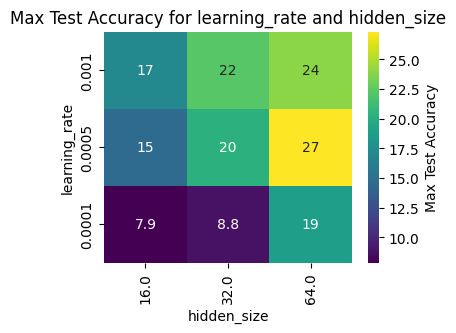

       Max Test Accuracy                  
                     1.0      2.0      3.0
0.0001            7.8664   8.7644  18.6782
0.0005           20.2945  27.3348  14.6911
0.0010           22.1983  24.3534  23.9583


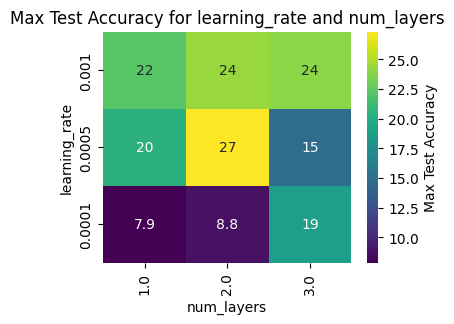

     Max Test Accuracy                  
                   1.0      2.0      3.0
16.0            7.8664  17.0259  19.7557
32.0           20.2945  24.6408  19.3966
64.0           11.0273  24.3534  18.6782


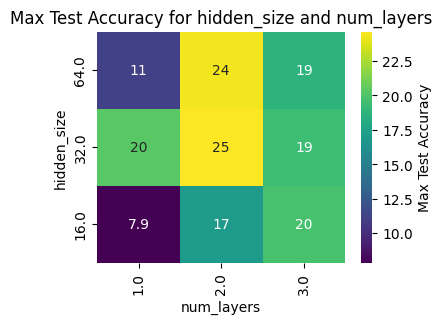

In [10]:
factorial_plot('results/rnn/32')

### Ejemplo de visualización de la máxima precisión alcanzada según el estado interno

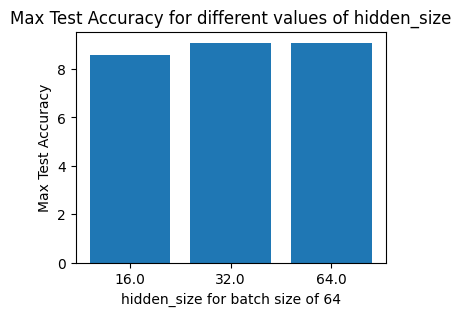

For hidden_size=16.0, max test accuracy 8.5756 is achieved by the model with hyperparameters from file: learning_rate=0.001_hidden_size=16_num_layers=3_num_heads=1.csv
For hidden_size=32.0, max test accuracy 9.0843 is achieved by the model with hyperparameters from file: learning_rate=0.001_hidden_size=32_num_layers=2_num_heads=5.csv
For hidden_size=64.0, max test accuracy 9.048 is achieved by the model with hyperparameters from file: learning_rate=0.001_hidden_size=64_num_layers=3_num_heads=5.csv


In [29]:
directory = "./results/transformer/64"
hyperparam = 'hidden_size'
analyze_results(directory, hyperparam)

### Ejemplo de visualización de la evolución de la precisión y el coste de los caminos generados por un modelo

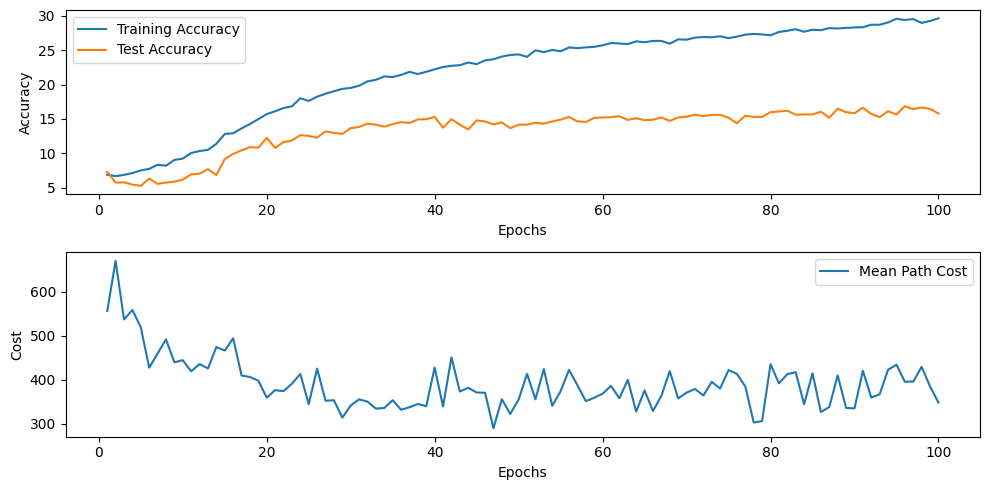

Maximum test accuracy achieved: 16.8605 on Epoch: 95


In [7]:
plot_csv('results/rnn/64/learning_rate=0.0005_hidden_size=32_num_layers=3.csv')